In [106]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [303]:
def affichage(N, data_list, mu, sigma):
    "Fonction d'affichage des histogrammes et de la loi normale du TCL"
    fig=plt.figure(figsize=(8,8))
    for i,data in enumerate(data_list):
        plt.hist(data, bins=50, density=True, alpha=0.5, color='blue')

        x_range = np.linspace(min(data), max(data), 100)
        mean, std_dev = mu[i], sigma[i]/np.sqrt(N)
        
        # Calculer la densité de la loi normale
        pdf = scipy.stats.norm.pdf(x_range, mean, std_dev)

        # Tracer la densité de la loi normale
        plt.plot(x_range, pdf, 'r')

    plt.xlabel('Valeurs')
    plt.ylabel('Densité')

    # Afficher le graphique
    plt.show()

$\mu = \int_0^1g(x)q(x)dx=\int_0^1cos(\frac{\pi x}{2})dx = \frac{2}{\pi}$

$q(x) = \mathbb{1}_{[0, 1]}(x)$

Variance théorique: $\sigma^2= \int_0^1g^2(x)q(x)dx - \mu^2 = \frac{1}{2}-(\frac{2}{\pi})^2$

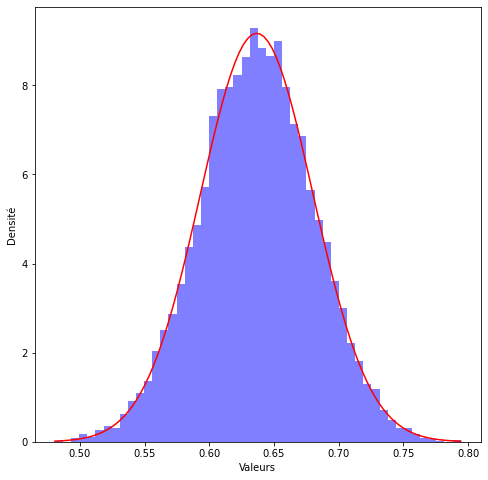

(0.0019158720387128635, 0.001894305308612977)

In [304]:
def echantillon(N):
    return np.cos(np.pi*np.random.uniform(0,1, N)/2)

def variance_empirique(M, N):
    data= [np.mean(echantillon(N)) for i in range (M)]
    affichage(N, [data], [2/np.pi], [np.sqrt(0.5-(2/np.pi)**2)])
    return np.var(data)

M=10000
N=50

variance_empirique(M, N), (0.5-(2/np.pi)**2)/N

$\hat{q}(x)=\frac{1-(\frac{\pi x}{2})^2}{1-\frac{\pi^2}{8}}$ pas positif

donc on prend $\hat{q}(x)=\frac{1-x^2}{1-\frac{1}{2}}= \frac{3}{2}(1-x^2)$

Méthode rejet avec $C=1$ car $g(x)=cos(\frac{\pi x}{2})$.

$P_a= \frac{2}{3}$

In [313]:
C=1

def qtilde(x):
    return 1.5*(1-x*x)

def rejet(C):
    flag=True
    nb_iter=1
    while flag:
        x=np.random.uniform(0,1)
        u=np.random.uniform(0,1)
        if 1-x*x > C*u:
            return x
        nb_iter+=1

def echantillonnage_qtilde(N,C):
    X=[rejet(C) for i in range(N)]
    return np.mean([np.cos(np.pi*x/2)/qtilde(x) for x in X])

def approx_variance_empirique(pas):
    X=np.linspace(0,1-1e-6,pas)
    res= np.sum([(1/pas)*np.cos(np.pi*x/2)**2/(1-x*x) for x in X])
    return (2/3)*res - (2/np.pi)**2

var_qtilde=approx_variance_empirique(100000)
var_q=0.5-(2/np.pi)**2
print(var_q, var_qtilde, np.sqrt(var_q/var_qtilde))

0.09471526543064884 0.0009905077866207979 9.778698214455455


La variance empirique avec $\hat{q}$ est environ de 0.00099. La variance précédente était de 0.09471, soit 100 fois plus grande.

 On peut donc avoir la même précision sur la paramètre $\mu$ en générant 100 fois moins $X_i$.

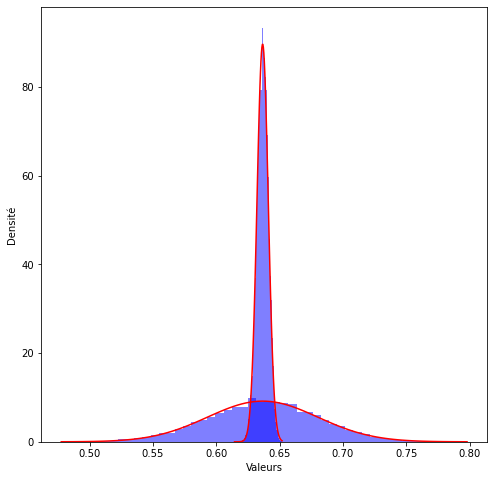

0.0010027608229590255

In [314]:
def variance_empirique_qtilde(M, N, C):
    data= [np.mean(echantillon(N)) for i in range (M)]
    data_dilde= [np.mean(echantillonnage_qtilde(N,C)) for i in range (M)]
    affichage(N, [data, data_dilde], [2/np.pi, 2/np.pi], [np.sqrt(var_q), np.sqrt(var_qtilde)])
    return np.var(data_dilde)

N*variance_empirique_qtilde(M, N, C)